# Linear Regression

In [29]:
import pandas as pd
from pandas import DataFrame as df
from pandas import Series as sr
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression as lr

In [30]:
data = pd.read_csv("state_rankings.csv")

data.index = data.Name
data.drop("Name", axis=1, inplace=True)
data.sample(5)

,Employment & Earnings,Political Participation,Poverty & Opportunity,Reproductive Rights,Health & Well-Being,Work & Family,Tweets Per Person
Name,,,,,,,
Rhode Island,10,24,15,15,21,5,8.960285e-12
Colorado,12,19,8,21,6,11,5.342430e-12
Massachusetts,3,5,3,14,9,24,3.275839e-12
Washington,17,4,15,10,14,14,2.616966e-12
Nevada,41,42,39,17,40,23,5.090271e-12


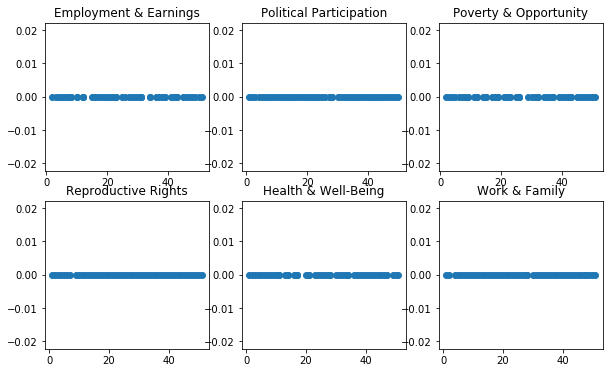

In [31]:
x = data.values[:, :6]
y = data.values[:, 6]

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for i in range(6):
    j = i//3
    k = i%3
    axes[j][k].scatter(x[:, i].reshape(-1, 1), y)
    axes[j][k].set_title(data.columns[i])
plt.show()

__all attributes__

In [32]:
model = sm.OLS(y, x)
result = model.fit()
param_ref = result.params
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.336
Date:                Fri, 08 Dec 2017   Prob (F-statistic):              0.262
Time:                        19:08:30   Log-Likelihood:                 1196.1
No. Observations:                  50   AIC:                            -2380.
Df Residuals:                      44   BIC:                            -2369.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -9.181e-14   3.33e-13     -0.276      0.7

__one attribute at a time__

In [33]:
for i in range(6):
    model2 = lr()
    model2.fit(x[:, i].reshape(-1, 1), y)
    model2.predict(x[:, i].reshape(-1, 1))
    print(data.columns[i], "r-squared score:")
    print(model2.score(x[:, i].reshape(-1, 1), y))

Employment & Earnings r-squared score:
0.0574579124715
Political Participation r-squared score:
0.0419260458637
Poverty & Opportunity r-squared score:
0.0615826767053
Reproductive Rights r-squared score:
0.0906410285504
Health & Well-Being r-squared score:
0.0694981269834
Work & Family r-squared score:
0.0117593616534


__Attribute's influence__

In [34]:
for i in range(6):
    param_ref_temp = np.delete(param_ref, i, 0)
    model = sm.OLS(y, np.delete(x, i, 1))
    result = model.fit()
    param_ref1 = result.params
    print(data.columns[i]+"\'s influence:")
    print(sum(np.divide(abs(param_ref1 - param_ref_temp), abs(param_ref_temp))))

Employment & Earnings's influence:
1.38442445262
Political Participation's influence:
1.21778652029
Poverty & Opportunity's influence:
1.80779420997
Reproductive Rights's influence:
1.20590725447
Health & Well-Being's influence:
1.01432323242
Work & Family's influence:
5.03672577685
